In [1]:
from engine.vector_backtest_engine import vector_backtest
from factor_manager.factor_miner.momentum import Momentum
from factor_manager.factor_miner.doubleMA import DoubleMA
from factor_manager.factor_miner.rsi import RSI
from factor_manager.factor_miner.kdj import KDJ
from factor_manager.factor_miner.rumi import RUMI
from portfolio_manager.portfolio_template import get_portfolio_pnl
import argparse

In [2]:
def get_args_with_batch_id(batch_id):
    parser = argparse.ArgumentParser()
    parser.add_argument("--factor_name", "-m", default="Momentum", help="Factor name")
    parser.add_argument("--model_name", type=str, default="equal_weight", help="Model name")
    parser.add_argument("--model_id", type=str, default="equal_weight", help="Model id")
    parser.add_argument("--signal_method", type=str, default="equal_weight", help="Equal_weight or prediction in creating signal")
    parser.add_argument("--back_window", type=int, default=1000, help="Number of trading days for train data")
    parser.add_argument("--target", type=str, default="tag_raw", help="tag_raw or tag_ranked in model prediction")
    parser.add_argument("--with_pca", type=bool, default=False, help="PCA in model training")
    parser.add_argument("--trade_type", type=str, default='long_short', help="Long only or long short in signal evaluation")
    parser.add_argument("--upper_bound", type=float, default=0.5, help="Upper bound of signal to weight")
    parser.add_argument("--lower_bound", type=float, default=0.5, help="Lower bound of signal to weight")
    args = parser.parse_args()

    if batch_id == 1:
        args.model_name = 'equal_weight'
        args.model_id = 'equal_weight'
        args.signal_method = 'equal_weight' 
        args.target = 'tag_raw'   
        args.with_pca = False

    elif batch_id == 2:
        args.model_name = 'OLSLRModel'
        args.model_id = 'OLSLRModel'
        args.signal_method = 'regression' 
        args.target = 'tag_raw'   
        args.with_pca = False
        
    elif batch_id == 3:
        args.model_name = 'OLSLRModel'
        args.model_id = 'OLSLRModel_PCA'
        args.signal_method = 'regression'
        args.target = 'tag_raw'
        args.with_pca = True
        
    elif batch_id == 4:
        args.model_name = 'LogisticModel'
        args.model_id = 'LogisticModel_tag_class'
        args.signal_method = 'classification' 
        args.target = 'tag_class'
        args.with_pca = False
          
    return args

高相关因子融合

2023-12-31 01:30:09.164 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2023-12-31 01:30:09.166 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801      1075.656      1086.303     1102.662
open            996.996      1008.279      1059.141      1075.562      1087.68
high           1021.568      1060.898      1086.694      1095.841     1108.291
low             993.892      1008.279      1059.095       1070.98     1082.509
pre_close        1000.0      1011.347      1060.801      1075.656     1086.303
change           11.347        49.454        14.855        10.647       16.359
pct_chg          1.1347        4.8

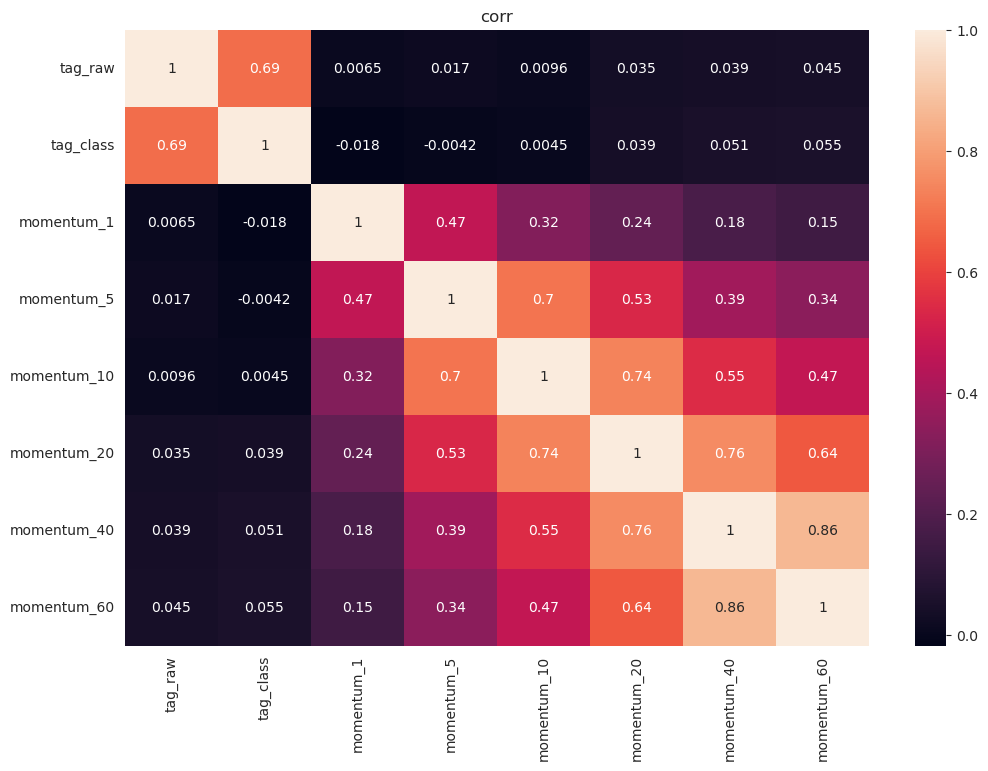

2023-12-31 01:30:28.185 | INFO     | engine.vector_backtest_engine:vector_backtest:157 -                                000016.SH_benchmark  000016.SH_equal_weight  \
annualized return                         0.075339                0.084813   
sharpe ratio                              0.291962                0.373715   
win ratio                                 0.502988                0.503892   
win per loss                              1.042277                1.063943   
annualized turnover(buy side)                  NaN               36.697013   
annualized costs                               NaN                0.016881   

                               000016.SH_OLSLRModel_PCA  \
annualized return                              0.005223   
sharpe ratio                                   0.020563   
win ratio                                      0.515081   
win per loss                                   0.945033   
annualized turnover(buy side)                 47.339907   
annualized

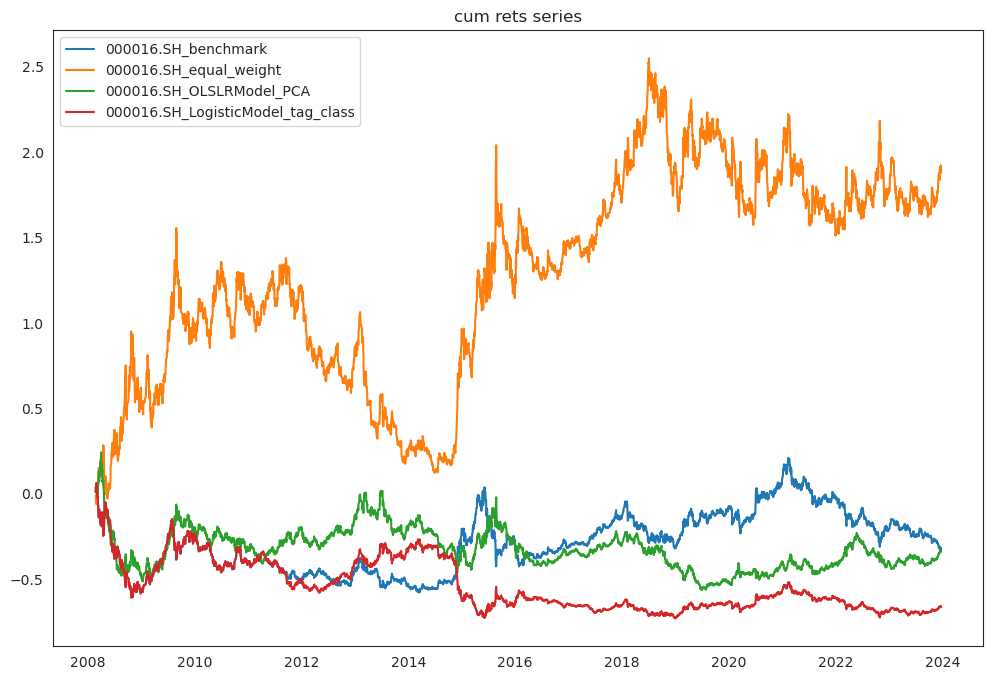

2023-12-31 01:30:28.582 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000300.parquet
2023-12-31 01:30:28.584 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1           2            3           4
ts_code       000300.SH    000300.SH   000300.SH    000300.SH   000300.SH
trade_date     20050104     20050105    20050106     20050107    20050110
close           982.794      992.564     983.174      983.958     993.879
open            994.769      981.577     993.331      983.045      983.76
high            994.769      997.323     993.788      995.711     993.959
low             980.658      979.877      980.33      979.812     979.789
pre_close        1000.0      982.794     992.564      983.174     983.958
change          -17.206         9.77       -9.39        0.784       9.921
pct_chg         -1.7206       0.9941      -0.946       0.0797      1.0083
vol  

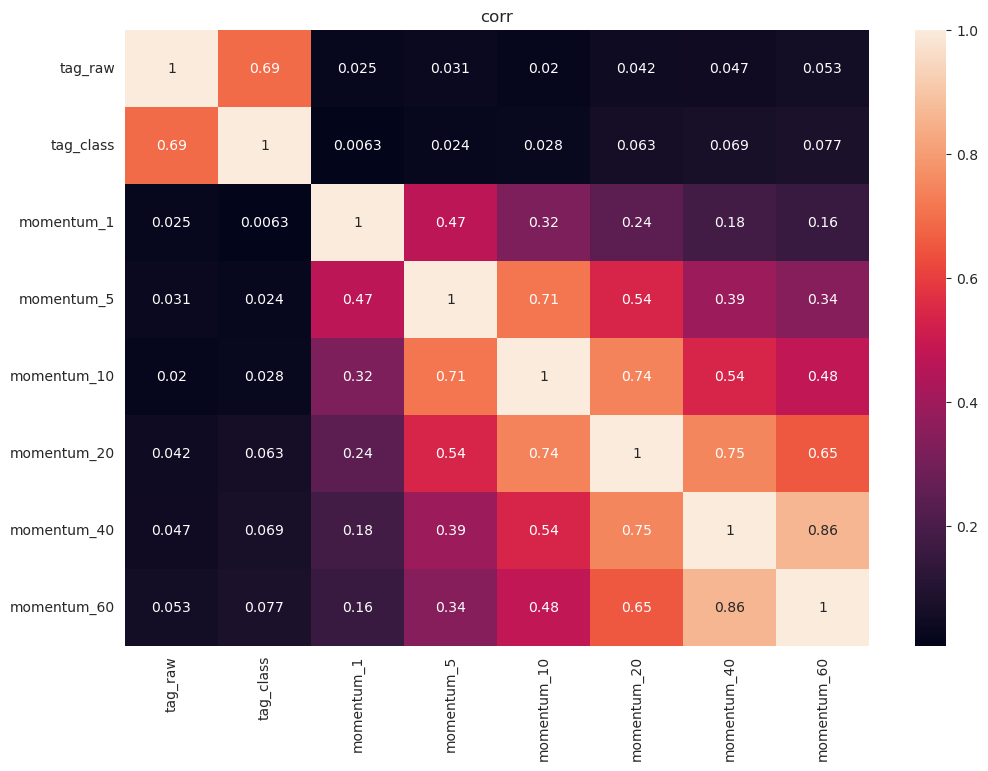

2023-12-31 01:30:44.812 | INFO     | engine.vector_backtest_engine:vector_backtest:157 -                                000300.SH_benchmark  000300.SH_equal_weight  \
annualized return                         0.100325                0.077282   
sharpe ratio                              0.388583                0.382903   
win ratio                                 0.525380                0.503739   
win per loss                              0.969576                1.065283   
annualized turnover(buy side)                  NaN               38.248049   
annualized costs                               NaN                0.017594   

                               000300.SH_OLSLRModel_PCA  \
annualized return                             -0.017955   
sharpe ratio                                  -0.078867   
win ratio                                      0.514840   
win per loss                                   0.929004   
annualized turnover(buy side)                 49.478815   
annualized

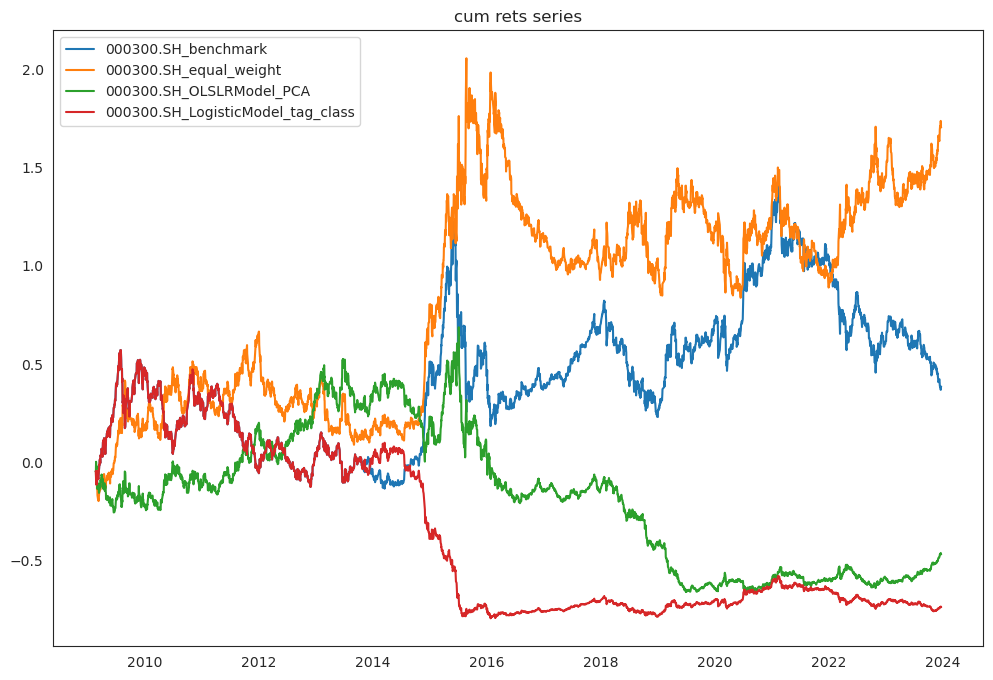

2023-12-31 01:30:45.141 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000905.parquet
2023-12-31 01:30:45.143 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1            2            3            4
ts_code       000905.SH    000905.SH    000905.SH    000905.SH    000905.SH
trade_date     20050104     20050105     20050106     20050107     20050110
close           986.927     1003.633      994.595      997.606     1006.337
open            996.682       986.57      1003.49      993.434      996.928
high            996.682     1008.855      1003.49       1009.0     1006.457
low             984.795      985.677      990.792      990.446      993.123
pre_close        1000.0      986.927     1003.633      994.595      997.606
change          -13.073       16.706       -9.038        3.011        8.731
pct_chg         -1.3073       1.6927      -0.9005       0.302

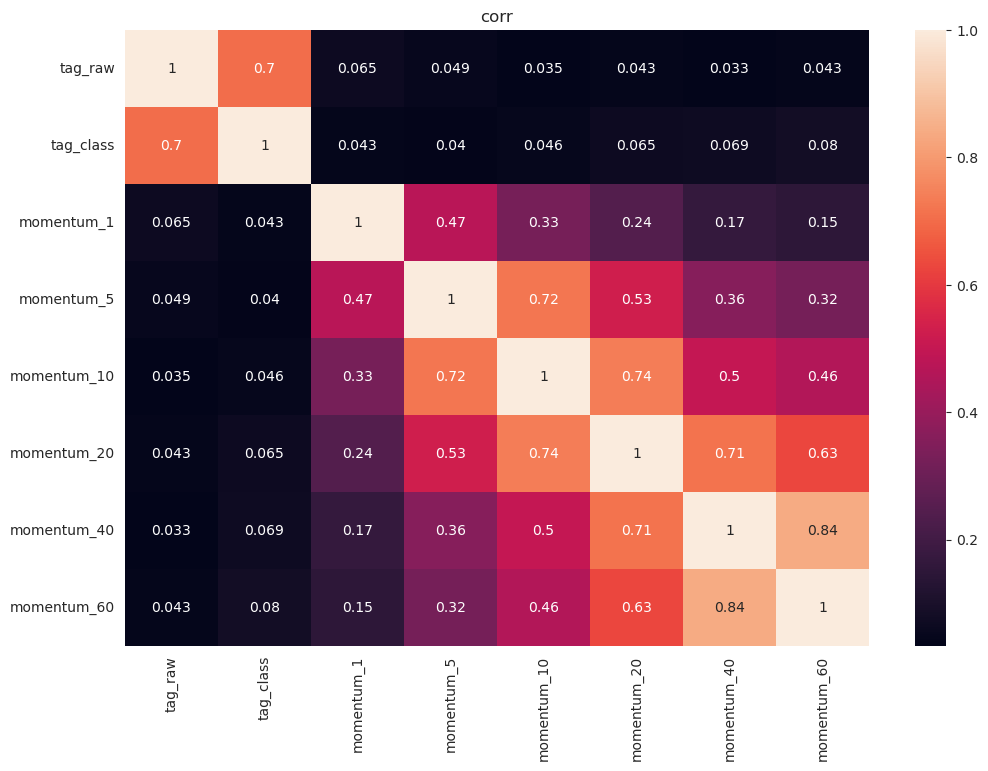

2023-12-31 01:31:00.308 | INFO     | engine.vector_backtest_engine:vector_backtest:157 -                                000905.SH_benchmark  000905.SH_equal_weight  \
annualized return                         0.135136                0.089276   
sharpe ratio                              0.462162                0.391679   
win ratio                                 0.553796                0.517308   
win per loss                              0.875335                1.009365   
annualized turnover(buy side)                  NaN               35.953166   
annualized costs                               NaN                0.016538   

                               000905.SH_OLSLRModel_PCA  \
annualized return                             -0.105531   
sharpe ratio                                  -0.411360   
win ratio                                      0.489734   
win per loss                                   0.968502   
annualized turnover(buy side)                 73.764608   
annualized

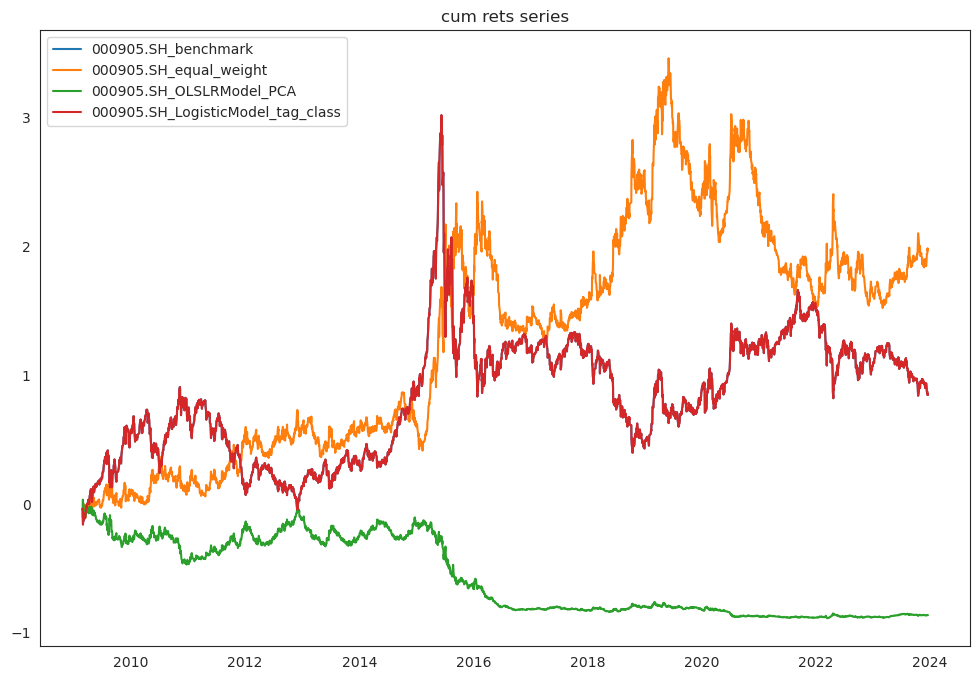

2023-12-31 01:31:00.655 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000852.parquet
2023-12-31 01:31:00.656 | INFO     | data_manager.data_loader:load_data_by_file:16 -                      0          1           2           3           4
ts_code      000852.SH  000852.SH   000852.SH   000852.SH   000852.SH
trade_date    20050104   20050105    20050106    20050107    20050110
close          989.984   1013.583    1005.465     1011.74    1023.638
open           996.278    989.873    1014.965    1005.515    1011.925
high           996.278   1018.261    1014.965    1021.706    1023.638
low            982.988    988.568    1001.213    1001.096    1007.802
pre_close       1000.0    989.984    1013.583    1005.465     1011.74
change         -10.016     23.599      -8.118       6.275      11.898
pct_chg        -1.0016     2.3838     -0.8009      0.6241       1.176
vol          494737.55  822661.44   732454.01

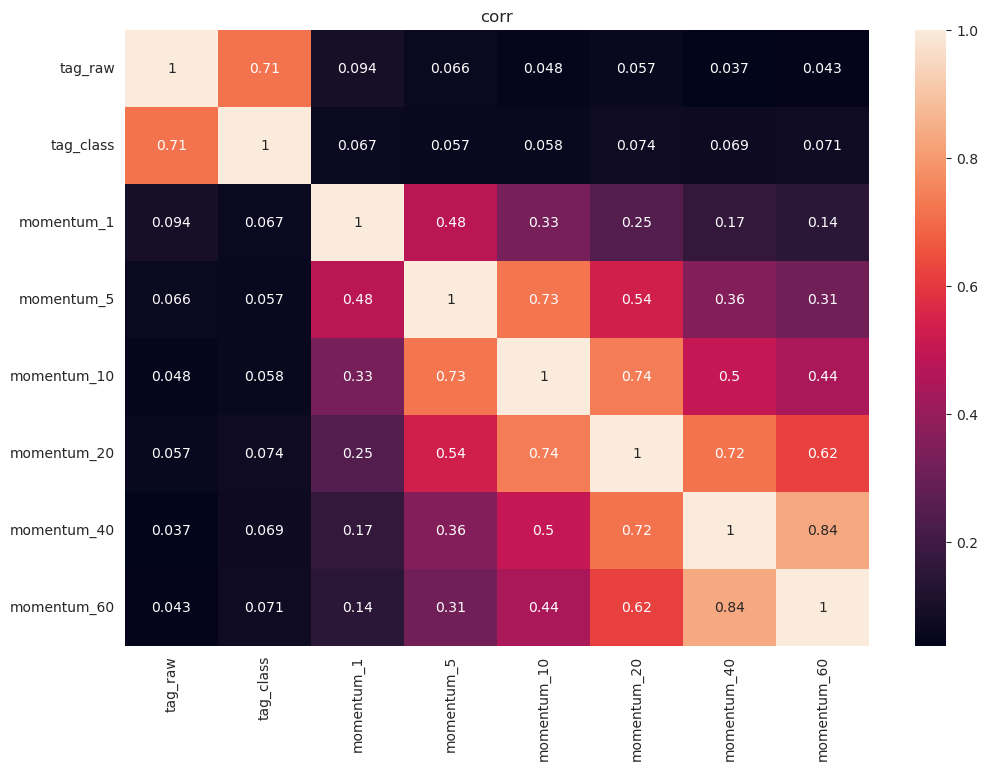

2023-12-31 01:31:17.224 | INFO     | engine.vector_backtest_engine:vector_backtest:157 -                                000852.SH_benchmark  000852.SH_equal_weight  \
annualized return                         0.142447                0.132397   
sharpe ratio                              0.469628                0.548232   
win ratio                                 0.560304                0.523678   
win per loss                              0.852614                1.014144   
annualized turnover(buy side)                  NaN               32.565481   
annualized costs                               NaN                0.014980   

                               000852.SH_OLSLRModel_PCA  \
annualized return                             -0.063627   
sharpe ratio                                  -0.233722   
win ratio                                      0.488759   
win per loss                                   1.003922   
annualized turnover(buy side)                 90.094711   
annualized

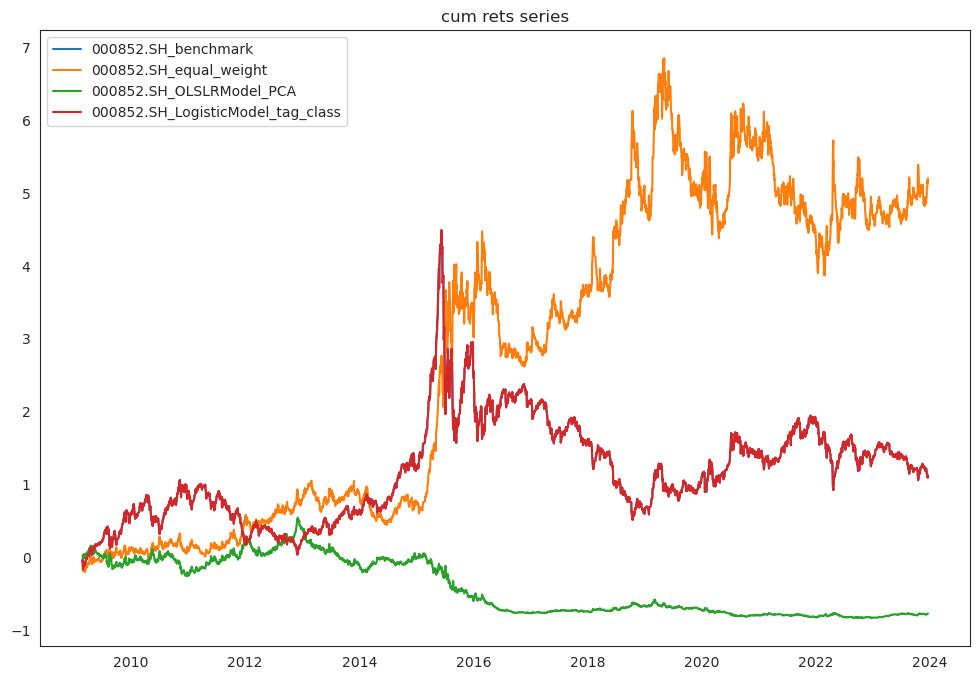

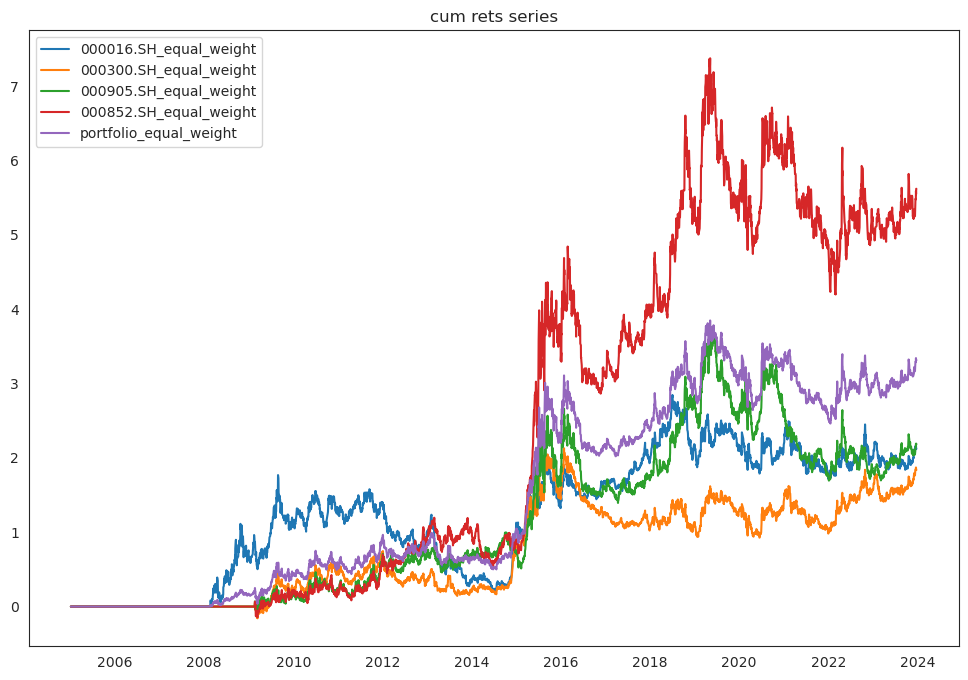

In [3]:
factor_classes = [Momentum]
contracts = ['000016.SH', '000300.SH', '000905.SH', '000852.SH']
args_list = [get_args_with_batch_id(batch_id) for batch_id in [1, 3, 4]]
dict_signal, dict_pnl = vector_backtest(factor_classes, contracts, args_list)
get_portfolio_pnl(dict_pnl, contracts, chosen_model_id = 'equal_weight')